In [2]:
## Install Pandas Data Reader
!pip install pandas-datareader
!pip install yfinance


In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yf

# Fetch Tesla stock data
df_tesla = yf.download('TSLA', start='2020-01-01', end='2024-12-16')
df_tesla



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2024-12-09,397.609985,404.799988,378.010010,389.790009,389.790009,96359200
2024-12-10,392.679993,409.730011,390.850006,400.989990,400.989990,97563600
2024-12-11,409.700012,424.880005,402.380005,424.769989,424.769989,104287600


<h2> Simple Moving Average
<h4>Simple Moving Average (SMA) is a statistical method used to smooth time-series data by calculating the average of data points over a specified number of periods.</h4>

<Axes: xlabel='Date'>

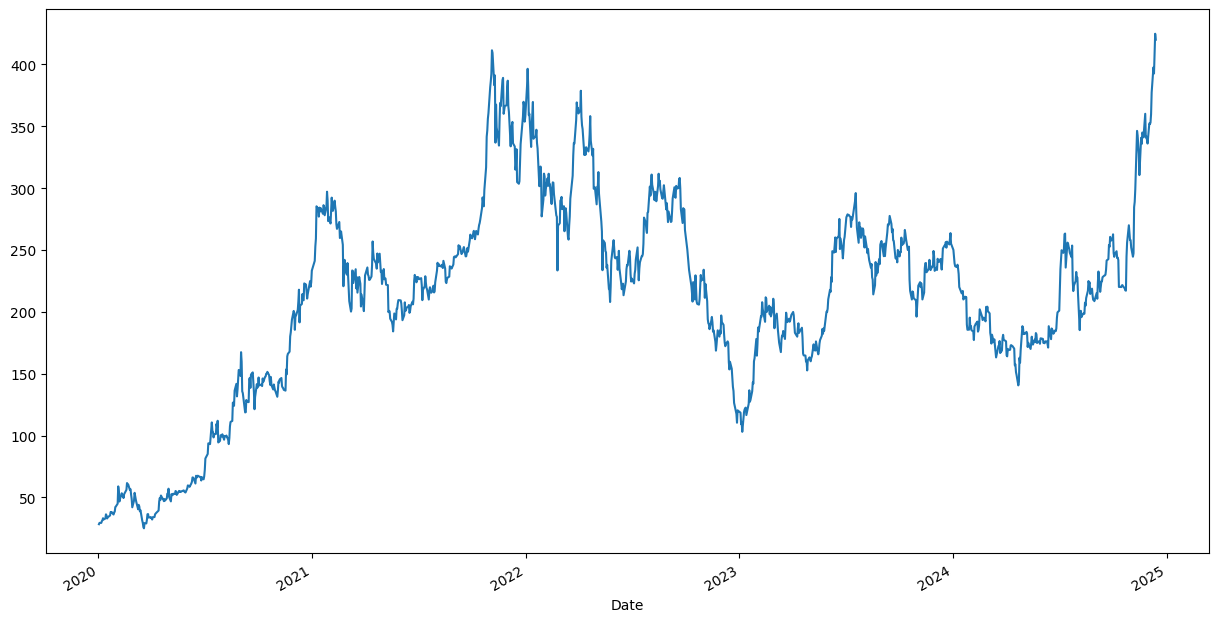

In [4]:
df_tesla['Open'].plot(figsize=(15,8))

<h4>The full form of NaN is Not a Number.



In [5]:
df_tesla['Open:10 Days rolling']=df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<Axes: xlabel='Date'>

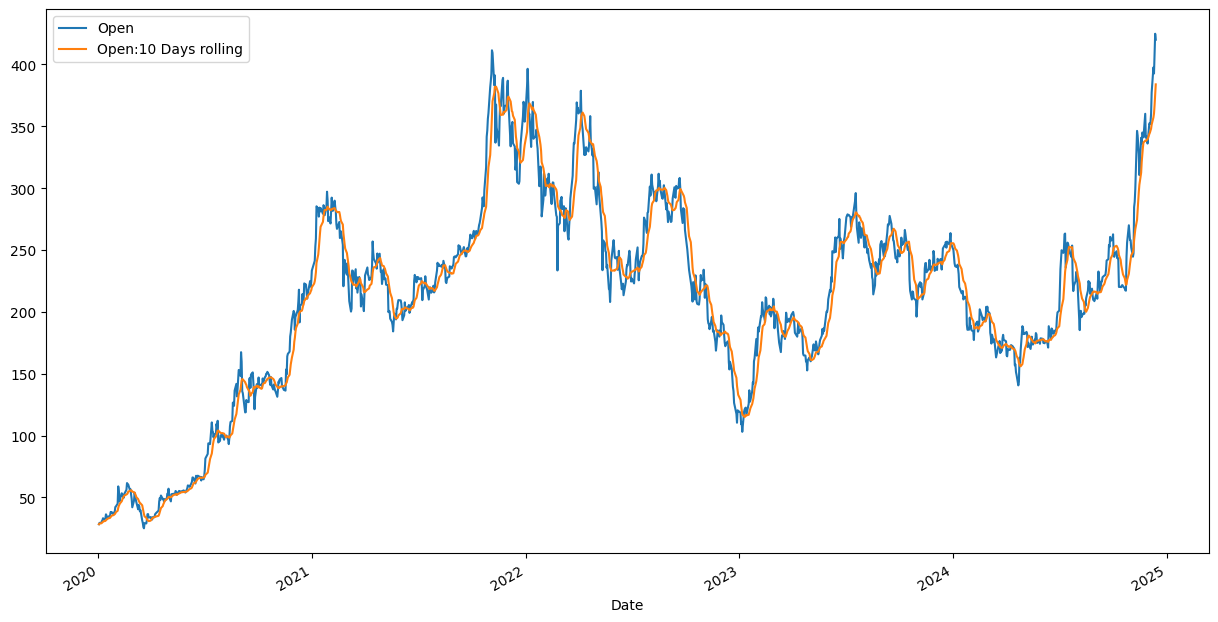

In [6]:
df_tesla[['Open','Open:10 Days rolling']].plot(figsize=(15,8))

<Axes: xlabel='Date'>

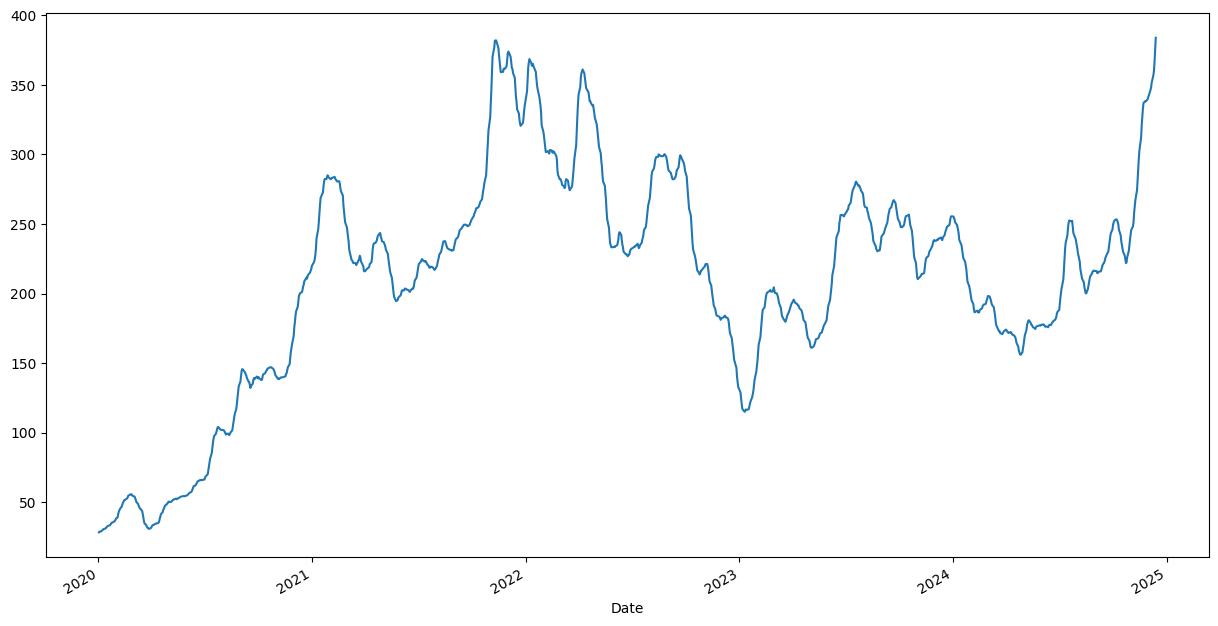

In [7]:
df_tesla['Open:10 Days rolling'].plot(figsize=(15,8))

<Axes: xlabel='Date'>

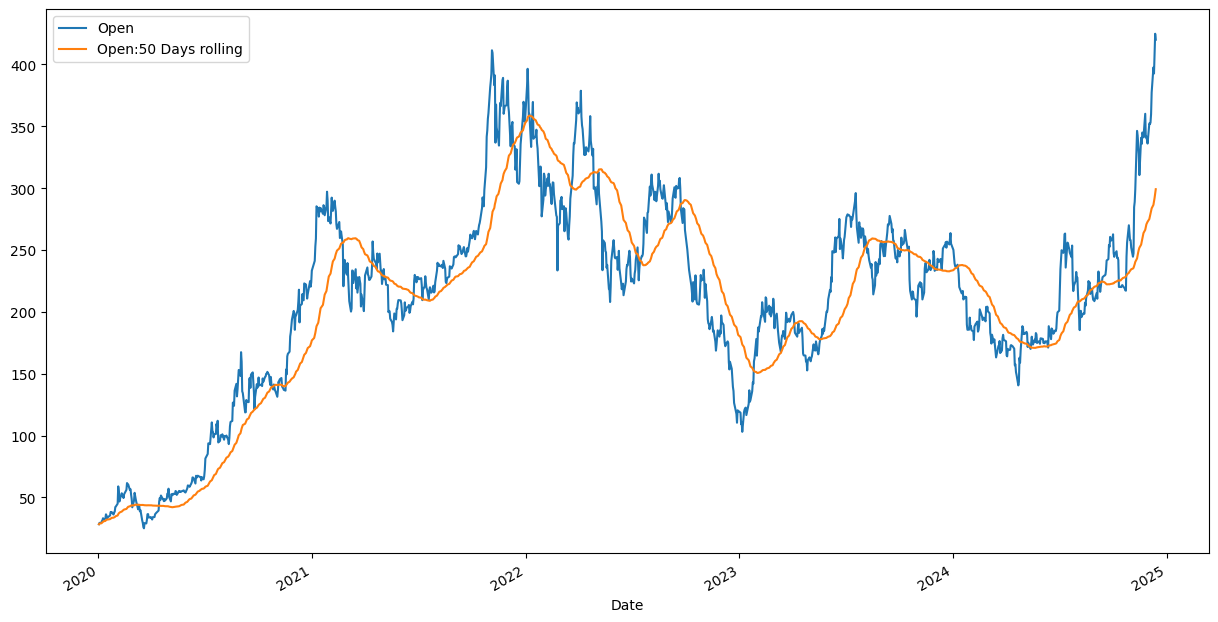

In [8]:
df_tesla['Open:50 Days rolling']=df_tesla['Open'].rolling(window=50,min_periods=1).mean()
df_tesla[['Open','Open:50 Days rolling']].plot(figsize=(15,8))

<h4> More rolling windows means more smooth graph.
This SMA is highly used in stock market analysis.

<h1> Expanding

In [9]:
df_tesla['Open'].expanding() 


Expanding [min_periods=1,axis=0,method=single]

<Axes: xlabel='Date'>

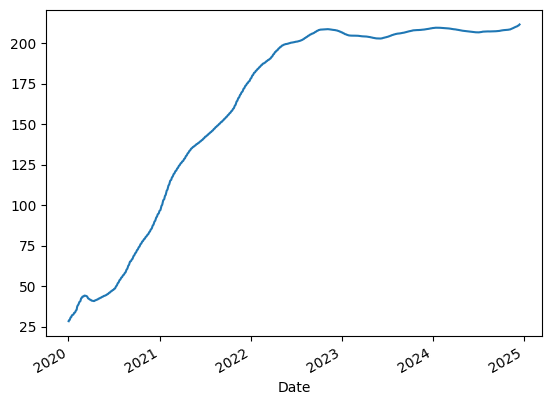

In [10]:
df_tesla['Open'].expanding().mean().plot()

<h4>Unlike a rolling window, an expanding window includes all values from the start of the data up to the current point.</h4>

<h1>Exponential Weighted Moving Average</h1>

In [18]:
df_tesla['EMA_0.1']= df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()
#smoothing factor is 0.1

<h4>ewm stands for Exponential Weighted Moving. 
    A smaller alpha value means smoother results (less sensitivity to recent changes).
For alpha=0.1, 10% of the weight is given to the latest value, while the remaining 90% is distributed over the older values.
    
df_tesla['EMA_0.1']:
The resulting EMA is stored in a new column named EMA_0.1.

<Axes: xlabel='Date'>

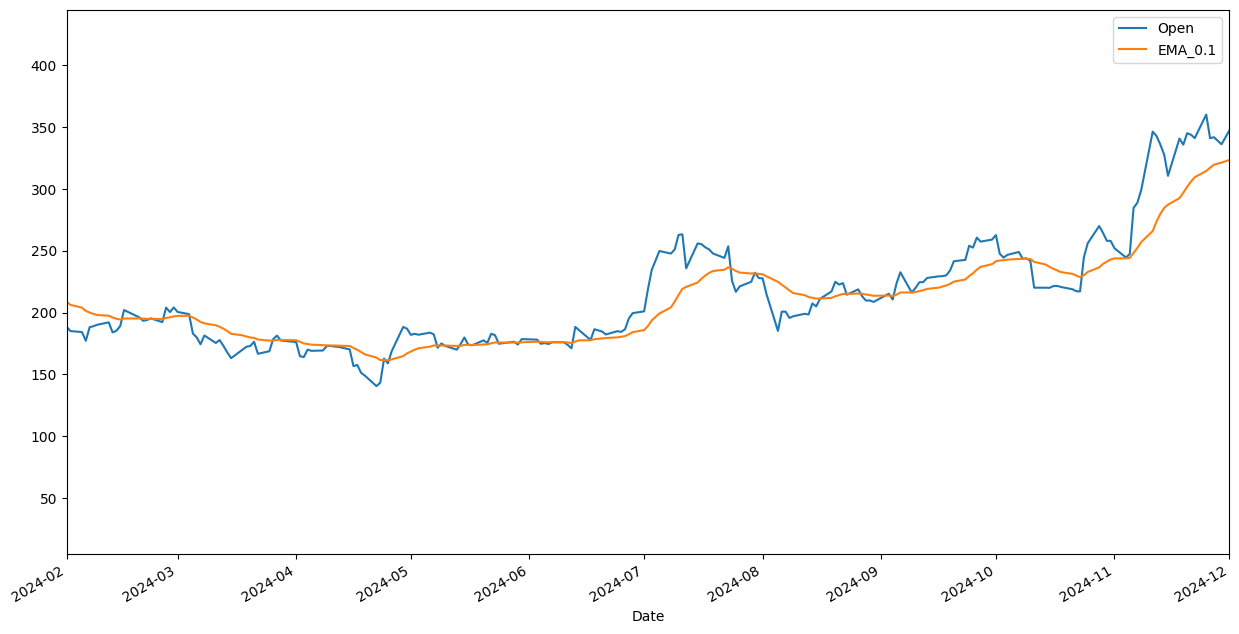

In [19]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2024-02-01','2024-12-01'],figsize=(15,8))

<Axes: xlabel='Date'>

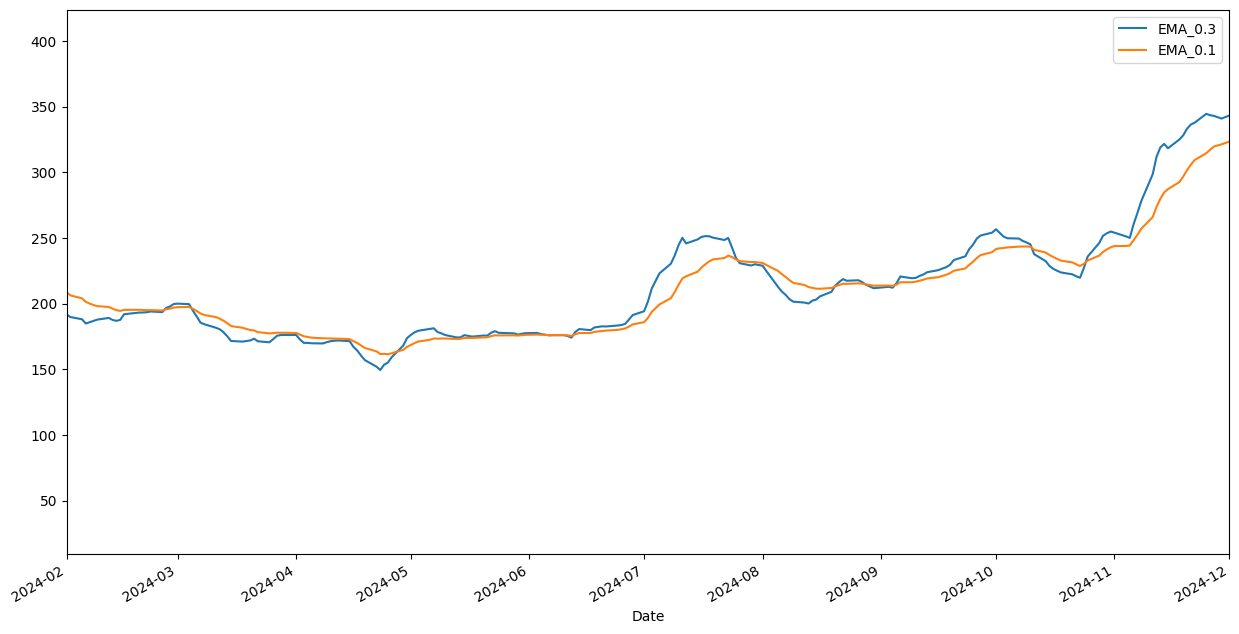

In [20]:
df_tesla['EMA_0.3']= df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()
df_tesla[['EMA_0.3','EMA_0.1']].plot(xlim=['2024-02-01','2024-12-01'],figsize=(15,8))


In [24]:
df_tesla['EMA_5days']= df_tesla['Open'].ewm(span=5).mean()


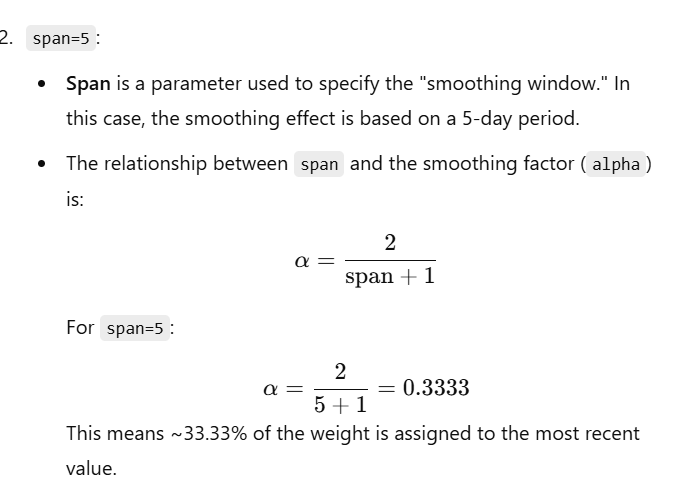

<Axes: xlabel='Date'>

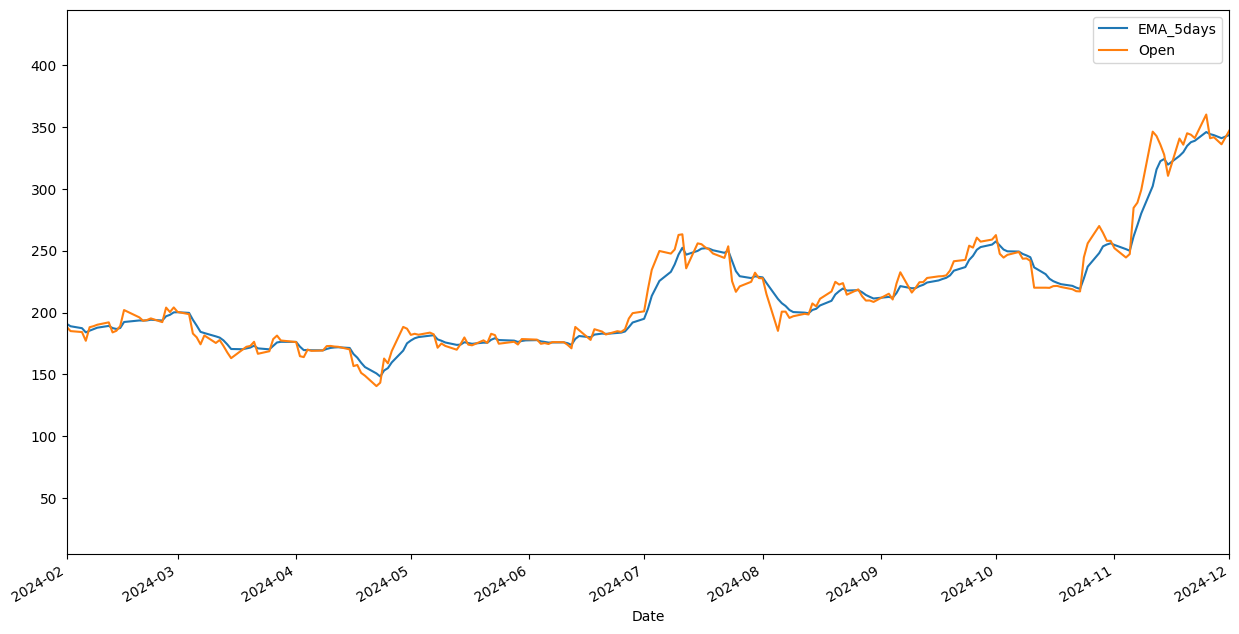

In [25]:
df_tesla[['EMA_5days','Open']].plot(xlim=['2024-02-01','2024-12-01'],figsize=(15,8))


<h3>Purpose of the Code
<h4>This code calculates a 5-day Exponential Moving Average for the Open prices in the Tesla stock dataset. It provides a smoothed trendline of the opening prices, giving more weight to recent prices compared to older ones.

<h1>ARIMA</h1>
<h4>
    ARIMA stands for AutoRegressive Integrated Moving Average. It is a popular time series forecasting method.
</h4>